# Introduction avancée à Matplotlib
## A - Introduction aux classes et objets 
### Contexte et objectif
Bienvenue dans ce cours complémentaire sur Matplotlib. Vous y apprendrez à utiliser la bibliothèque d'une nouvelle manière, et y découvrirez de nouveaux types de graphiques.

Dans le module précédent, vous avez appris à produire et manipuler différents types de graphiques grâce au module matplotlib.pyplot, mais ce n'est pas la seule manière d'utiliser Matplotlib.

La méthode orientée objet est la méthode la plus adaptée en Python pour interagir avec Matplotlib. C'est également la manière la plus puissante de coder avec Matplotlib parce qu'elle permet un contrôle complet du résultat, bien qu'elle soit aussi la plus complexe.

Aucune référence à un objet n'a été faite dans le cours précédent, les différents objets ont été créés automatiquement en arrière plan lors de l'appel à des fonctions pyplot, et les changements sont apparus dans le notebook.

Les objets les plus récurrents sont les objets de classes 'Figures' et 'Axes'. Plus de détails sur la documentation en ligne.
Dans la suite nous utiliserons principalement les objets , mais également pyplot pour certaines instructions élémentaires.

En utilisant les fonctions vues dans le module précédent, le morceau de code suivant:

x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))
plt.plot(x, y)
plt.title('random numbers')
produit le graphique:  

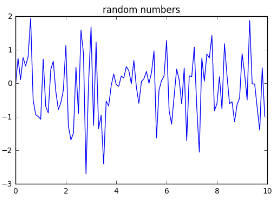

Avec le module pyplot , lorsque la fonction plot est appelé , une 'Figure' est automatiquement créée, par un appel invisible à la fonction figure. De même, un graphique (objet 'Axes') est automatiquement intégré à celui-ci.

Il est possible de créer explicitement ces objets, et ainsi pouvoir les manipuler directement plus facilement.

Voici le même code retranscrit dans un style orienté objet:

x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))
fig = plt.figure()
ax = fig.add_subplot(111)
l, = ax.plot(x, y)
t = ax.set_title('random numbers')
Ici, on crée une figure appelé fig, à laquelle on ajoute un graphique ax grâce à la méthode add_subplot.

La fonction plot, que l'on applique sur le graphique ax, retourne une liste d'éléments Line2D, une pour chaque ligne (dans ce cas, il n'y en a qu'une).
Dans le code ci-dessus, l est une référence à l'objet ligne , donc chaque opération permise sur un objet Line2D peut être faite en utilisant l, ce qui permet beaucoup plus de personnalisation.

Par exemple, pour changer la couleur de la ligne plus tard, après l'appel de la fonction plot, il sera possible d'utiliser: l.set_color('red') au lieu de modifier l'argument dans la fonction.

In [25]:
### Veuilez exécuter cette cellule de code avant de commencer l'exercice
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython

Pour commencer un graphique il faut d'abord créer une figure. La fonction plt.figure retourne une figure, sur laquelle on peut rajouter un ou plusieurs graphiques (objets 'Axes'). Les arguments figsize et facecolor de la fonction permettent de modifier respectivement la taille et la couleur de fond de la figure.

La commande fig.add_subplot(111) retourne une grille (Axes), sur laquelle on peut afficher un graphique. C'est la manière la plus courante d'ajouter un 'Axes' à une figure, mais add.subplot fait plus que créer un graphique, elle ajoute un objet 'subplot', qui fonctionne comme on l'a vu dans le module précedent en prenant 3 paramètres: numrows, numcols, fignum.

numrows représente le nombre de lignes de subplots à préparer.
numcols représente le nombre de colonnes de subplots à préparer.
fignum varie de 1 à numrows  ××  numcols et représente le numéro du subplot à utiliser.
Exemple :

ax = fig.add_subplot(1, 1, 1) : s'utilise lorsqu'un seul graphique est nécessaire.

ax2 = fig.add_subplot(212) : sépare la figure en 2 sous-graphiques sur 2 lignes et indique que l'on souhaite travailler sur la deuxième.

Une fois les objets 'Axes' crées, si aucun n'est précisé, la méthode plot est appliquée à la dernière instance créée.
Pour ajouter spécifiquement du contenu à l'un des graphiques, il suffit d'appliquer les méthodes équivalentes aux fonction habituelles.
Example:
plt.barplot() devient ax.barplot()

En utilisant les fonctions plt.figure et add.subplot, créer une figure appelée 'fig' de taille (8,4), composée de 2 graphiques 'ax1' et 'ax2', côte à côte, sur la même ligne
Sur le premier sous-graphique tracer une courbe de couleur verte passant par les points (0,1) , (2,3) , (3,2)
Sur le second afficher l'histogramme obtenu à partir de la liste d'éléments suivante: [1, 2, 2, 2, 3, 3, 4, 5, 5]

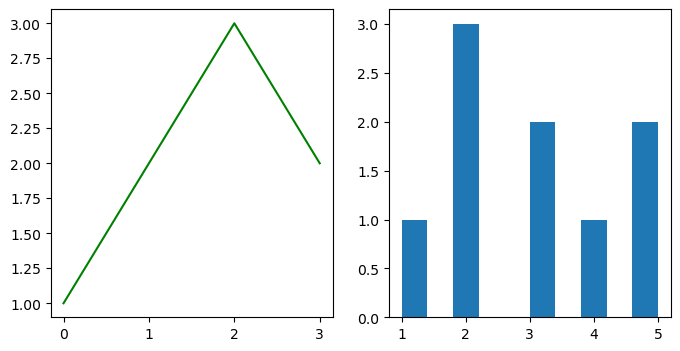

In [26]:
fig = plt.figure(figsize=(8,4))
# On crée une figure

ax1 = fig.add_subplot(121)
# On ajoute un espace graphique à cette figure, divisé en 2 colonnes.

ax2 = fig.add_subplot(122)
# On ajoute le deuxième sous-graphique.

ax1.plot([0, 2, 3], [1, 3, 2], 'green');
# Dans le premier graphique, on trace une courbe

ax2.hist( [1, 2, 2, 2, 3, 3, 4, 5, 5]);
# Dans le second graphique, on affiche un histogramme.

# Il est possible également d'utiliser les commandes plt.plot() et plt.hist(),
# mais on préfere ici utiliser les objets pour mieux assimiler leur utilisation.


### Figures multiples
Matplotlib offre également la possibilité de tracer plusieurs figures, en faisant appel à la fonction figure plusieurs fois de suite. Les figures peuvent ensuite être utilisées exactement de la même manière que dans le cas d'une figure simple.

Afficher les mêmes graphiques que dans la question précédente, mais sur deux figures différentes, appelées 'fig1' et 'fig2'


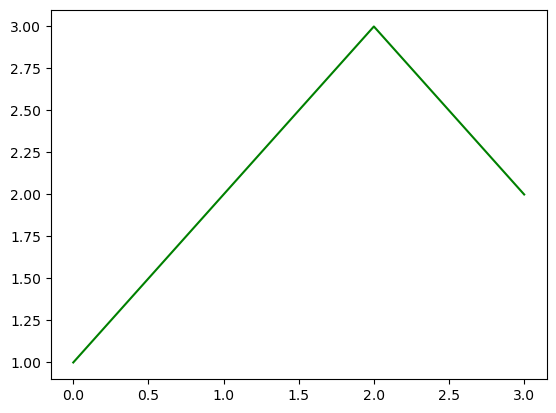

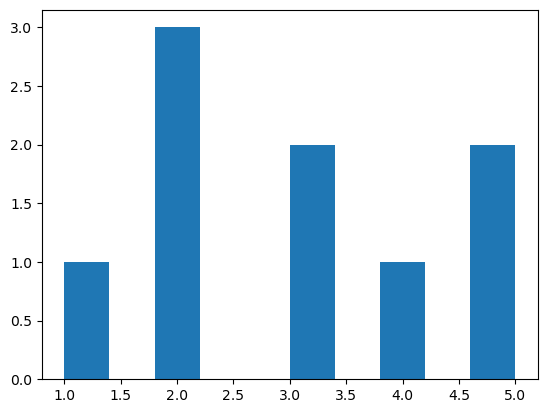

In [27]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot([0, 2, 3], [1, 3, 2], 'green');

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.hist( [1, 2, 2, 2, 3, 3, 4, 5, 5]);

### Donner des noms aux axes
Les commandes set_xlabel et set_ylabel permettent d'attribuer des labels aux axes x et y d'un graphique, de la même manière que les fonctions xlabel et ylabel de pyplot.

### Rajouter des axes
Dans certaines situations, il est possible de vouloir tracer deux différentes séries de données sur le même graphique, avec différentes graduations d'axes. La fonction twinx permet de créer un nouveau couple d'axes au sein d'un graphique existant, avec une graduation en ordonnées différente. A l'inverse twiny permet de partager l'axe des ordonnées mais d'avoir des graduations différentes en abscisses.

Exemple : Création d'un nouveau couple d'axe
x = np.arange(-10, 10, 0.1)
y1 = x**2
y2 = x**3
fig = plt.figure()
#
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('x au carré')
#
ax2 = ax1.twinx()   #La Commande importante !
ax2.plot(x, y2, 'r')
ax2.set_ylabel('x au cube');
produit le graphique :

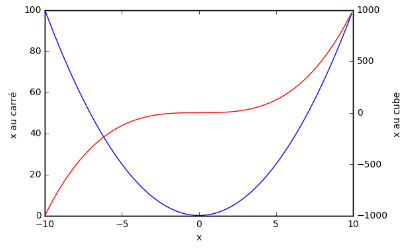

Un second objet 'Axes' est créé par la fonction twinx et est superposé sur le premier. C'est pour cela qu'il est nécessaire de donner une autre couleur à la seconde courbe, sinon elle aurait été bleue comme s'il s'agissait d'une nouvelle figure.

Créer une séquence x de nombres entre0.1 et la constante e, avec un pas de 0.01   

Créer les séries de valeurs y1 et y2 correspondant respectivement à  exp(−x)exp(−x)  et  log(x)log(x)    

Afficher sur la même figure fig les courbes relatives à (x, y1) et (x, y2) avec deux axes Y différents, le premier avec le label 'Valeurs de Y pour exp(-x)' et le deuxième avec le label 'Valeurs de Y pour ln(x)'

Text(0, 0.5, 'Valeurs de Y pour ln(x)')

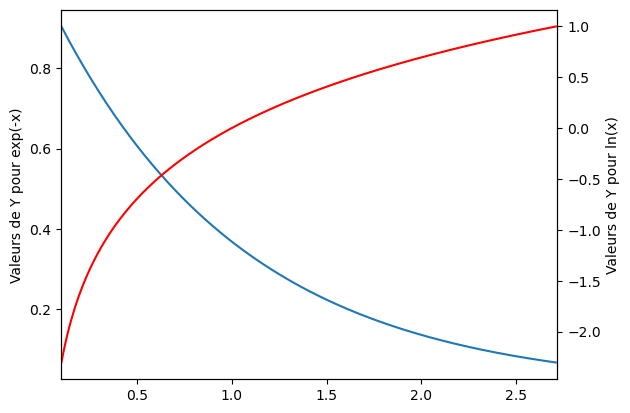

In [28]:
x = np.arange(0.1, np.e, 0.01)
y1 = np.exp(-x)
y2 = np.log(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Valeurs de Y pour exp(-x)')

ax2 = ax1.twinx() # Fonction importante !
ax2.plot(x, y2, 'r')
ax2.set_xlim([0.1, np.e])
ax2.set_ylabel('Valeurs de Y pour ln(x)')

### Partager un axe

Parfois il est préférable d'afficher plusieurs graphiques dans la même figure, sous forme de subplots, tout en partageant un axe, grâce aux arguments sharex et sharey de la fonction add_subplot.
Il est également possible d'utiliser ces deux arguments ensembles, ce qui peut s'avérer utile lorsque les différentes donnés ont les même unités de mesure.

Exemple : Affichage de plusieurs graphiques
x = np.arange(11)
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(x, x)
ax2 = fig.add_subplot(312, sharex=ax1)
ax2.plot(2*x, 2*x)
ax3 = fig.add_subplot(313, sharex=ax1)
ax3.plot(3*x, 3*x);
affiche la figure :

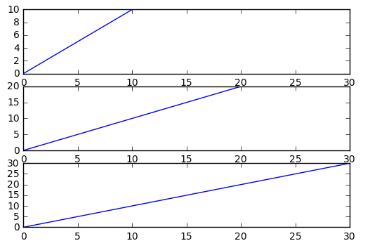

L'axe des abscisses va de 0à 30, car les limites s'adaptent pour permettre d'afficher tous les graphiques.

Créer une séquence de nombre allant de 0 à 10, avec un pas de 0.01
Créer une figure appelée fig dans laquelle on ajoutera 4 objet 'Axes', grâce à la fonction add.subplot :
Dans le premier, 'ax1', on tracera la courbe (x, sin(x))
Dans le deuxième, 'ax2, la courbe (-x, cos(x))
Dans le troisième, la courbe (2*x, sin(2*x)) en partageant l'axe des abscisses avec ax1
Dans le quatrième graphique, afficher la courbe (x, -cos(x)) en partageant l'axe des abscisses avec ax2

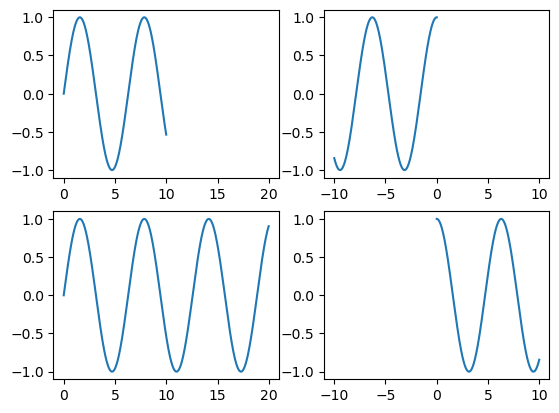

In [29]:
x = np.arange(0,10,0.01)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, np.sin(x));
ax2 = fig.add_subplot(222)
ax2.plot(-x, np.cos(x));
ax3 = fig.add_subplot(223, sharex=ax1, )
ax3.plot(x*2, np.sin(x*2));
ax4 = fig.add_subplot(224, sharex=ax2)
ax4.plot(x, np.cos(x));


Les figures, graphiques, et sous-graphiques peuvent être créés en une seule commande, grâce à la fonction plt.subplots (faire attention au s), qui prend comme arguments le nombre de lignes et le nombre colonnes.
Ici, les argument sharex et sharey sont des booléens True ou False qui permettent de paramétrer les axes des graphiques de la même manière, ou pas.

Exemple :
fig,axes = plt.subplots(3,2,sharex=True,sharey=True)

Le tableau axes contient tous les sous-graphiques ainsi créés. Par la suite, pour accéder au graphique de la  ièmeième  ligne et la  jèmejème  colonne, il suffit d'indiquer axes[i ,j]

Créer une figure et quatre sous-graphiques sur deux lignes et deux colonnes, partageant les même axes
Grâce à deux boucles for, ajoutez à chaque graphique, un histogramme de 500 valeurs aléatoires obtenus grâce à np.random.randn, avec 50 intervalles, de couleur noir ('black') et de niveau de transparence (alpha) 0,5
   Le paramètre alpha, existe pour tous les graphiques, et permet de régler le niveau de transparence (0 = transparent, 1 = opaque).

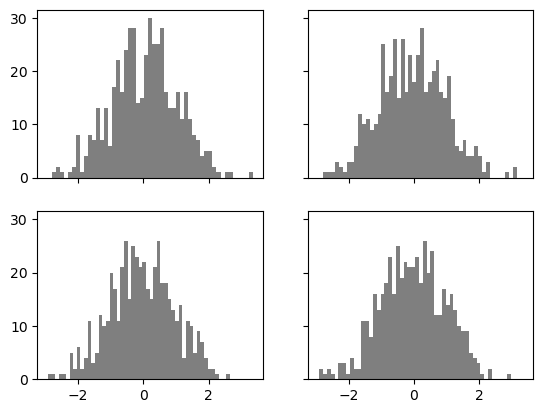

In [30]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
# Les 4 sous-graphiques sont créés.
# Sharex et sharey indiquent que les sous-graphiques
# ont des axes paramétrés de la même manière

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='black', alpha=0.5)
# L'objet "axes" est un array 2d, simple à indicer et parcourir avec une boucle

## B - Ticks labels et légendes

In [31]:
### Veuillez exécuter cette cellule de code avant de commencer l'exercice
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Trois méthodes clés existent pour customiser les axes d'un graphique:

xlim : pour délimiter l'étendue des valeurs de l'axe.
xticks : pour modifier les graduations sur l'axe.
xticklabels : pour donner des labels aux graduations de l'axe.
Pour l'axe des ordonnées les méthodes équivalentes sont: ylim, yticks, yticklabels.

Pour récupérer les valeurs fixées :

plt.get_xlim
plt.get_xticks
plt.get_xticklabels
Pour fixer ces valeurs :

plt.set_xlim([début, fin])
plt.set_xticks(maListeDeTicks)
plt.set_xticklabels(maListeDeLabels)
La méthode cumsum appliquée à un tableau numpy retourne dans un nouveau tableau les sommes cumulées des colonnes de ce dernier.

Créer une figure fig, et un graphique ax1
Créer 3 séries de valeurs appelées respectivement s1, s2, s3, comprenant chacune les sommes cumulées de 50 valeurs aléatoires obtenus par np.random.randn
Tracer les 3 courbes correspondantes, avec le trio de couleurs ('#33CCFF', '#FFCC99', '#FF33CC'), le style de ligne '-.' et les labels 'courbe 1', 'courbe 2', 'courbe 3'
Délimiter les valeurs de l'axe des abscisses à [0, 21] et celui des ordonnées à [-15, 15], grâce aux fonctions ax1.set_xlim et ax1.set_ylim
Graduer l'axe des abscisses avec un pas de 2 (au lieu de 2.5) grâce à la fonction ax1.set_xticks
Modifier les labels des graduations en 'j + i' pour les i pairs entre 0 et 20 ('j+0', 'j+2' , 'j+4', ...)
Donner le titre 'Durée après le jour j' à l'axe des abscisses
Afficher les légendes au meilleur endroit sur le graphique


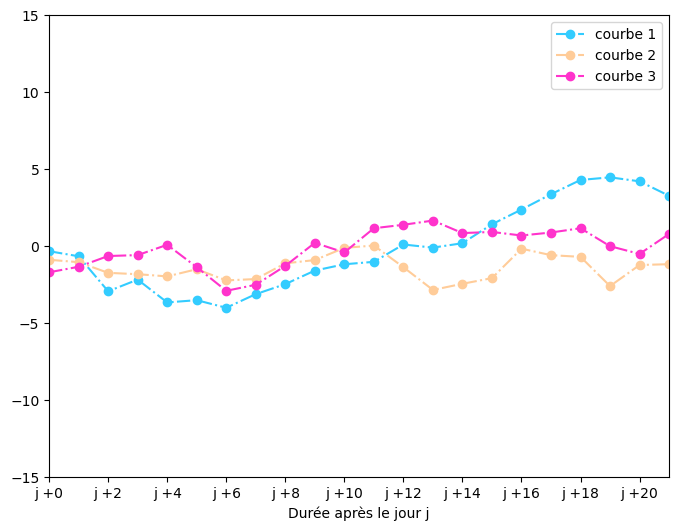

In [32]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

s1 = np.random.randn(50).cumsum()
s2 = np.random.randn(50).cumsum()
s3 = np.random.randn(50).cumsum()
# On crée les séries

ax1.plot(s1,color='#33CCFF',marker='o',linestyle='-.',label='courbe 1')
ax1.plot(s2,color='#FFCC99',marker='o',linestyle='-.',label='courbe 2')
ax1.plot(s3,color='#FF33CC',marker='o',linestyle='-.',label='courbe 3')
# On trace les courbes

ax1.set_xlim([0,21])
ax1.set_ylim([-15,15])
#On délimite les axes

ax1.set_xticks(range(0,21,2))
#On gradue l'axe avec un pas de 2 (au lieu de 2.5)

ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
#On modifie les labels sur la graduation

ax1.set_xlabel('Durée après le jour j')

ax1.legend(loc='best')
#permet de choisir l'endroit le plus vide sériesFF

## C - Les graphiques datés

### Plot_date
Matplotlib a une fonction interne pour tracer des courbes avec des dates, plot_date qui considère les données en abscisses ou ordonnées comme des dates, et donne aux axes les labels correspondants.

Le module datetime permet de générer des dates ou séquences de dates au format (année, mois, jour, heure, minutes, secondes).

La méthode plot_date reçoit en argument une séquence de dates, une séquence de valeurs de même taille, et des paramètres de style comme linestyle, sans lequel aucune ligne n'est tracée entre les marqueurs.

Exemple :

import datetime as dt
fig = plt.figure( figsize = (12, 4))
ax1 = fig.add_subplot(111)
dates = [dt.datetime(2017,1,17) + dt.timedelta(days=i) for i in range(10)]
values = np.random.rand(len(dates))
ax1.plot_date(dates, values, linestyle='-')
Voici le graphique produit (au 18 Janvier 2017) :

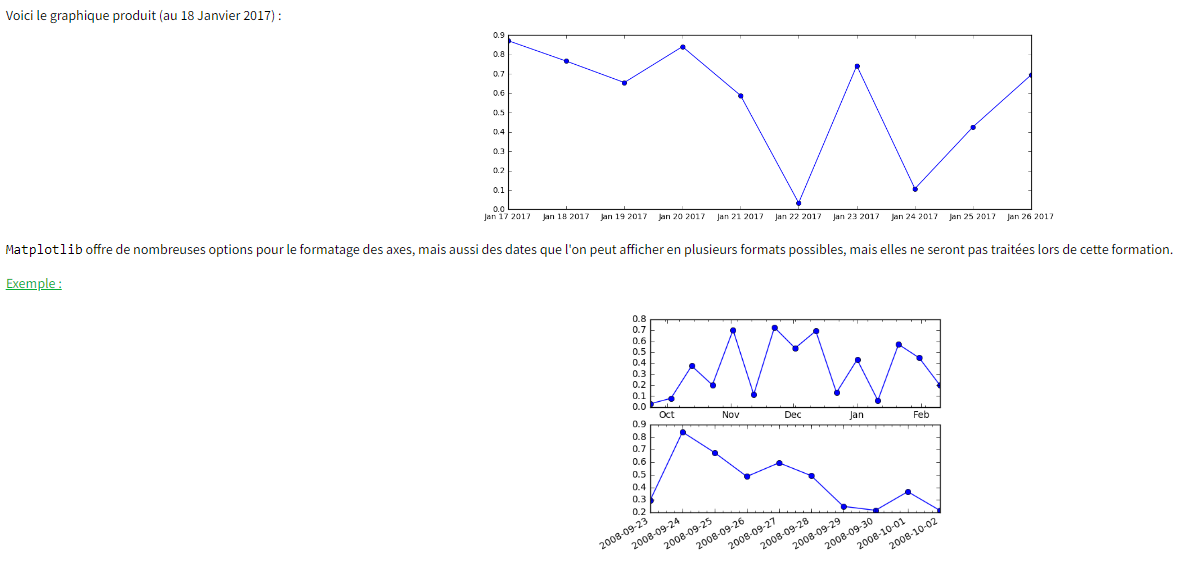

En s'inspirant du code de l'exemple ci-dessus, créer une figure de taille (12, 4), y ajouter un graphique débutant au 1er Janvier 2016 et prenant des valeurs aléatoires tous les 30 jours jusqu'au mois de Décembre 2016   

La commande dt.timedelta permet de rajouter à une date un nombre de jours, d'heures, de secondes etc..

## D - Text, Polices et Latex

Matplotlib permet d'avoir un contrôle total sur les propriétés du texte (police, taille, location, couleur..). Matplotlib implémente également de nombreux symboles mathématiques et commandes LaTeX n'importe où dans la figure.

Quelques fonctions de textes ont déjà été vues précédemment, mais voici la liste complète de toutes les fonctions qui peuvent être utilisées pour insérer du texte avec l'interface pyplot; présentées avec leurs méthode équivalentes en utilisant les objets Figures 'fig' et Axes 'ax'.

text <=> ax.text: Ajoute du texte à un emplacement arbitraire dans 'ax'.
xlabel <=> ax.set_xlabel: Ajoute un label à l'axe des abscisses de 'ax'.
ylabel <=> ax.set_ylabel: Ajoute un label à l'axe des ordonnées de 'ax'.
title <=> ax.set_title: Ajoute un titre à 'ax'.
figtext <=> fig.text : Ajoute un titre à 'fig'.
suptitle <=> fig.suptitle Ajoute un titre centré à 'fig'.
annotate <=> ax.annotate Ajoute une annotation et une flèche d'annotation à 'ax'.
Toutes ces commandes retournent un objet Text. Il est possible de personnaliser le texte en passant des arguments aux fonctions ou en utilisant matplotlib.artist.setp ou plt.setp.

Exemple : Personnalisation du texte

t = plt.xlabel('Un Label', fontsize=16, color='green')
est équivalent à

t = plt.xlabel('Un Label') 
plt.setp(t, fontsize=16, color='green')
La police d'un texte peut être modifiée grâce au paramètre family.
Il y a 6 familles de polices disponibles pour les textes: 'serif' , 'sans-serif' , 'cursive' , 'fantasy' et 'monospace'.
Le style de police peut également être modifié grâce à fontstyle qui peut être : 'normal', 'italic' ou 'oblique'.

Les objets textes d'un graphique peuvent également être retournés par des méthodes, comme par exemple ax.get_xticklabels qui retournent les noms des graduations de l'axe des abscisses.

La manipulation d'objets permet de régler les même propriétés à tous les objets d'un groupe.

Exemple : Objets d'un groupe

for t in ax.get_xticklabels():
    t.set_fontsize(5.)
ou encore avec setp:

plt.setp(ax.get_xticklabels(), fontsize=5.)
La taille de police de tous les labels de l'axe des abscisses a été modifiée.

Créer une figure de taille (4,4) et un graphique, lui donner le titre 'Mon titre', retourné dans un objet appelé t
Rajouter dans le graphique les textes 'Hello' au point (0.2,0.8), et 'Hello2' au point (0.7, 0.2) retournés dans une liste d'objets 'Text' appelée 'textes'
Modifier le titre grâce à setp, lui donner la couleur rouge et une taille de police 16
Modifier les texte grâce à setp, leur donner la police 'serif' et la couleur bleue

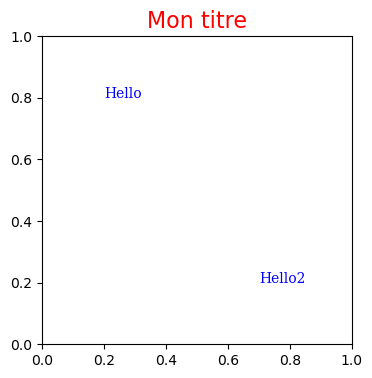

In [33]:
fig = plt.figure( figsize = (4, 4))
ax = fig.add_subplot(111)
t = ax.set_title('Mon titre')

textes = [ax.text(0.2, 0.8 ,'Hello'), ax.text(0.7, 0.2 ,'Hello2')]
# Les objets 'Text' créés sont retournés dans une liste

plt.setp(t, color='red', fontsize=16)

plt.setp(textes, family= 'serif', color = 'blue' );

# La commande 'setp' permet de régler les paramètres de 
# tous les élements de la liste 'textes'

Matplotlib permet d'afficher du texte au format LaTeX dans ses graphiques, en le précédant de 'r' en l'encadrant avec le symbole '$' et utilisant les fonctions et symboles mathématiques disponibles ici

Exemple : Texte au format LaTeX
fig = plt.figure()
ax= fig.add_subplot(111)
ax.text(0.1, 0.5, r"$ f(x,y) = x^2 + 3 \times \cos(y) $", fontsize=22)
affiche le graphique suivant:

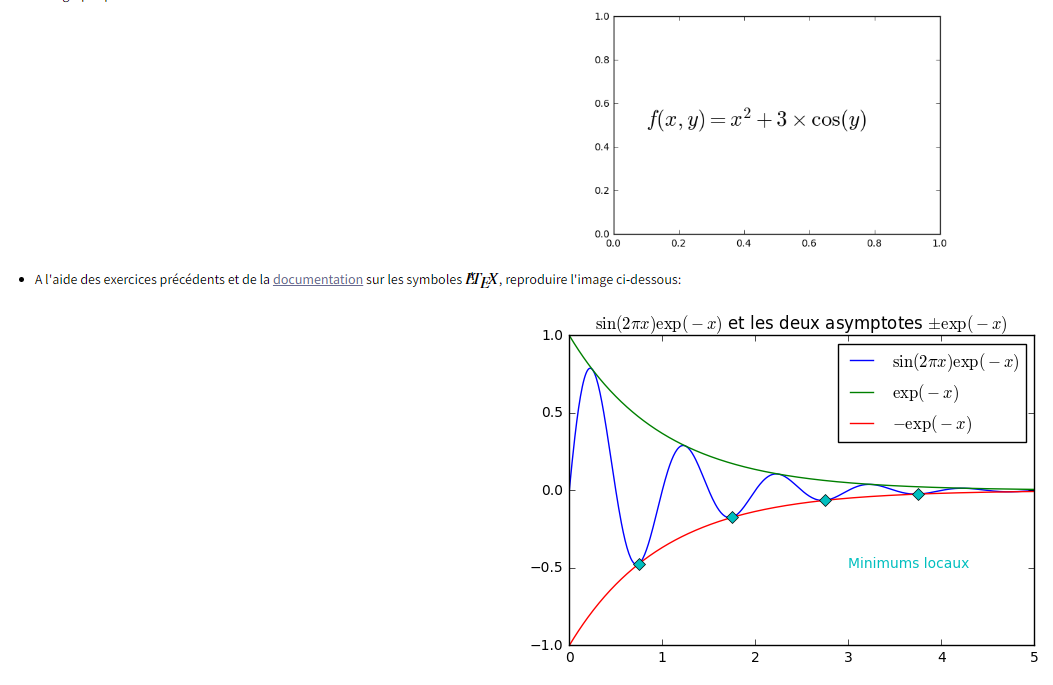

Dans un graphique, tracer les courbes de la fonction et ses asymptotes sur l'intervalle [0, 5]   

Faire apparaître les 4 points de minimums locaux ( valeurs de la fonctions pour x = 3/4 +k, k ∈∈  [0,4] ) avec les symboles diamants ('D').   

Ajouter le texte 'Minimus locaux' au point (3, -0.5)
Ajouter le titre, et faire apparaître les légendes

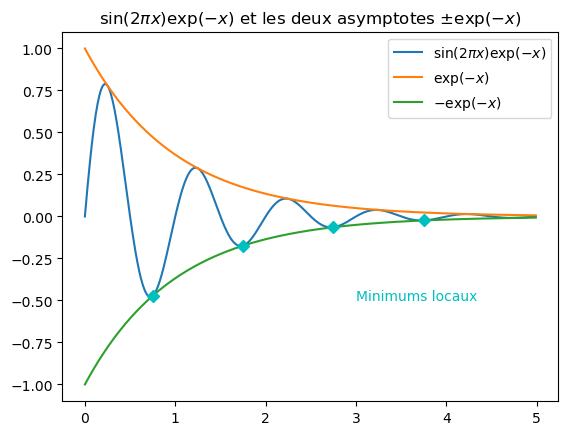

In [34]:
x = np.arange(0., 5., .01)
# On produit une séquence pour l'axe des abscisses.

y = np.sin(2*np.pi*x) * np.exp(-x)
# On implémente la fonction ci-dessus.

fig = plt.figure()
ax= fig.add_subplot(111)
# On crée la figure et le graphique.

ax.plot(x, y, label='$\sin(2\pi x)\exp(-x)$')
ax.plot(x, np.exp(-x), label='$\exp(-x)$')
ax.plot(x, -np.exp(-x), label='$-\exp(-x)$')
# On trace la fonction et ses deux asymptotes, et on leur donne des labels

p=[3/4 + k for k in range(4)]
# On implémente les 4 premiers arguments des minimums de la fonction

ax.plot(p, [-np.exp(-k) for k in p],'Dc')
# On trace les points de minimus locaux

ax.text(3, -0.5, 'Minimums locaux', color='c',)
# On ajoute le texte 'Minimums locaux'

ax.set_title('$\sin(2\pi x)\exp(-x)$ et les deux asymptotes $\pm\exp(-x)$')
# On ajoute le titre avec certaines parties en LaTeX

ax.legend();
# On affiche les légendes

## E - Contour Plots

La fonction plt.contour permet de tracer des courbes de niveaux.   

En particulier, pour une fonction à deux variables on parle de lignes de niveaux, qui sont des courbes sur lesquelles la fonction a une valeur constante. Mathématiquement, c'est un graphique qui représente f(x, y) = L, pour différentes constantes L.

Pour tracer des courbes de niveaux, il faut implémenter deux séquence de nombres x et y de tailles respectives m et n, puis créer un maillage bidimensionnel permettant de stocker l'intervalle de chacune des variable x et y , grâce à la fonction np.meshgrid qui retourne deux tableaux X et Y de taille n x m.

Il est ensuite possible d'effectuer des opérations sur ces matrices pour crée la surface Z représentative de la fonction que l'on souhaite utiliser.

La commande plt.contour(X,Y,Z) trace ensuite les courbes de niveaux, en utilisant X et Y pour les valeurs des coordonnées. Il est possible de préciser à la fonction le nombre de courbes que l'on souhaite ou bien même les valeurs des lignes de niveaux qu'elle doit afficher.

Exemple : Courbes de niveaux
x = np.arange(-1,1,0.05)
y = np.arange(-2, 2, 0.05)
X,Y = np.meshgrid(x,y)
Z = Y**2 - X**2
plt.contour(X,Y,Z)
produit le graphique suivant:

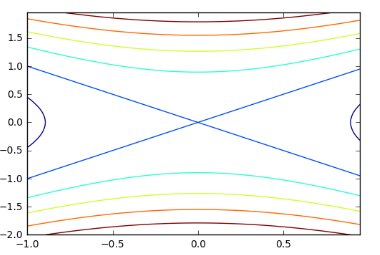

Il est également possible d'afficher sur le graphique les niveaux des courbes grâce à la fonction plt.clabel

Créer deux tableaux x et y contenant les valeurs de [-2;2], avec un pas de 0.01.
Créer les tableaux X et Y obtenus par la fonction np.meshgrid
Créer le tableau Z = X*X/9 + Y*Y/4 - 1
Créer les courbes de niveau de Z, retournées dans une variable appelée cs
Afficher les niveaux de cs sur les courbes grâce à la fonction clabel

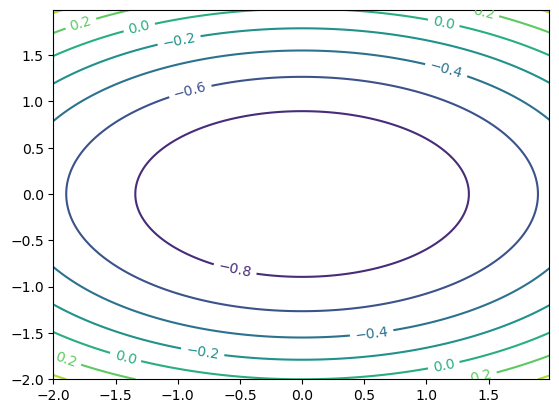

In [35]:
x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(x, y)
Z= X*X/9 + Y*Y/4 - 1
cs = plt.contour(X,Y,Z)
plt.clabel(cs);

Créer deux tableaux x et y contenant respectivement 50 valeurs entre -2 ππ  et 2 ππ  et 50 valeurs entres 0 et 4 ππ  grâce à la fonction np.linspace
Créer les tableaux X et Y obtenus par la fonction np.meshgrid
Créer le tableau Z =  sinX+cosYsin⁡X+cos⁡Y 
Afficher 10 courbes de niveau de Z
Ajouter le titre 'Contour Plot'
Ajouter les labels 'x' et 'y' aux axes

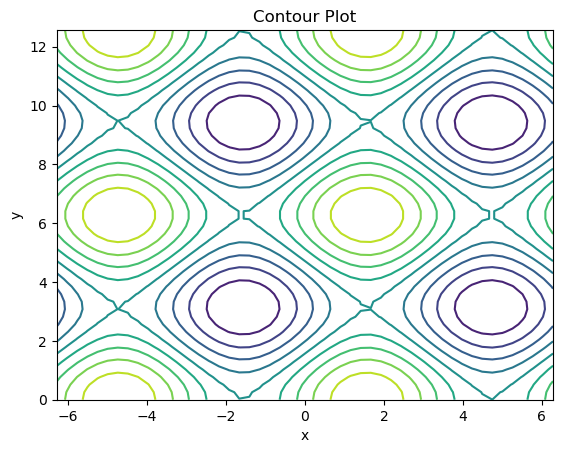

In [36]:
x = np.linspace(-2*np.pi,2*np.pi)
y = np.linspace(0,4*np.pi)
[X,Y] = np.meshgrid(x,y)
Z = np.sin(X)+np.cos(Y)
cp= plt.contour(X,Y,Z,10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot');

La méthode contourf fonctionne de la même manière que contour mais permet de créer des graphes colorés entre les lignes. Chaque couleur représente un niveau de la fonction, et la méthode plt.colorbar permet d'afficher une barre de couleurs avec les valeurs correspondantes.

Créer deux tableaux x et y contenant respectivement 200 valeurs entre -1 et 1 et 200 valeurs entres -1 et 2 grâce à la fonction np.linspace
Créer les tableaux X et Y obtenus par la fonction np.meshgrid
Créer la matrice Z définie par la fonction de Rosenbrock:  Z=(1−x)2+(y−x2)2Z=(1−x)2+(y−x2)2 
Afficher le contour plot coloré de Z, ainsi qu'une barre de couleurs
Ajouter le titre 'Fonction de Rosenbrock'

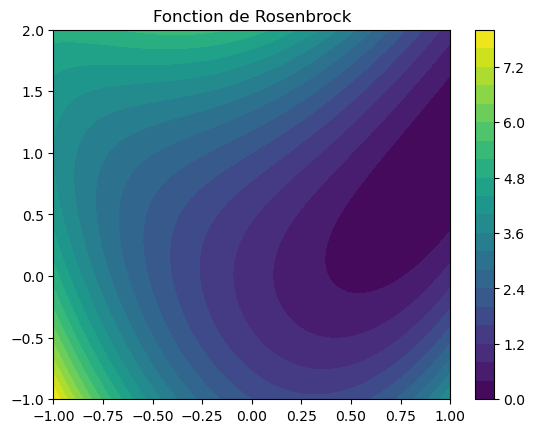

In [37]:
x , y = np.linspace(-1,1,200), np.linspace(-1,2,200)
X, Y = np.meshgrid(x,y)
Z = (1-X)**2+(Y-X**2)**2
plt.contourf(X,Y,Z,20)
plt.colorbar()
plt.title('Fonction de Rosenbrock');

## F - Polar Charts

Les graphiques polaires utilisent un système de coordonnées complètement différent. Jusqu'à présent, nous avons utilisé le système cartésien, où 2 lignes perpendiculaires se rencontrent à l'origine des axes avec des directions précises pour déterminer les valeurs positives et négatives. Un système polaires est un système de coordonnées à deux dimensions, où la position d'un point est exprimée en termes de radius et angle. Ce système est utilisé lorsque la relation entre deux points est mieux exprimée en utilisant ces informations.

Un point est donc représenté par 2 coordonnées: la coordonnée radiale et la coordonnée angulaire. La coordonnée radial (souvent notée r et appelée rayon) exprime la distance du point à un point central appelé pôle (équivalent à l'origine des coordonnées cartésiennes). La coordonnée angulaire (également appelée angle polaire et souvent notée θ) exprime la mesure, dans le sens trigonométrique (sens positif), de l'angle entre le point et la demi-droite d'angle 0°, appelée axe polaire (équivalente à l'axe des abscisses en coordonnées cartésiennes).

La fonction polar de Matplotlib permet de tracer des graphiques polaires. Ses paramètres sont 2 listes de même tailles, thêta pour les coordonnées angulaires et r pour les coordonnées radiales. Il s'agit de la fonction correspondant à la fonctionplot pour les graphiques polaires, elle peut donc prendre plusieurs thêta et r.

Exemple : Coordonnées polaires
theta = np.arange(0, 2, 1/180)*np.pi 
plt.polar(3*theta, theta/5)
plt.polar(theta, np.cos(4*theta))
plt.polar(theta, [1.4]*len(theta));

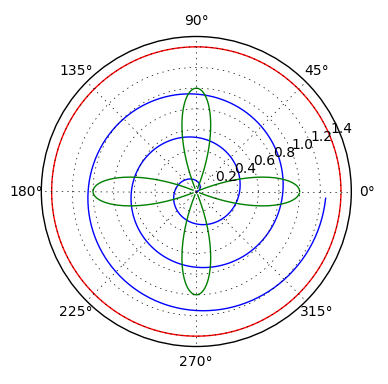

Dans l'exemple, on définit theta comme un tableau de 360 valeurs équidistantes entre 0 et 2 ππ . La seconde ligne dessine une spirale. La ligne suivante dessine une rosace Enfin, la dernière ligne dessine une ligne circulaire. Dans un système de coordonnées polaires, pour dessiner un cercle il suffit de garder r constant (ici on le fixe à 1.4).

Créer un tableau theta de 360 valeurs équidistantes entre 0 et 2 ππ 
Tracer la courbe en coordonnées polaires de theta et r = 4 ×× cos(12 ×× theta)

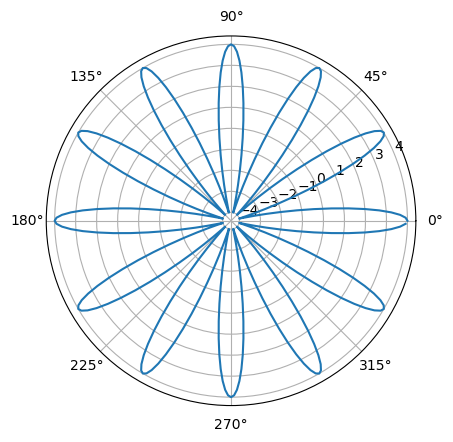

In [38]:
theta = np.arange(0, 2, 1./180.)*np.pi 
plt.polar(theta, 4*np.cos(12*theta));

Deux fonctions existent pour contrôler les grilles radiales et angulaires: rgrid et thetagrid.

rgrids prend les arguments suivant:

radii: Les distances radiales auxquelles les lignes de grille (les cercles en pointillés concentrés autour du pôle) doivent être tracées.
labels (optionnel) : Les labels à afficher sur les grilles.
angle (optionnel ): L'angle auquel les labels sont affichés (par défaut 22.5°).
thetagrids prend les arguments suivant:

angles: L'emplacement où afficher les labels.
labels (optionnel) : Les labels à afficher aux angles données
frac (optionnel) : La fraction de rayon des axes polaires à laquelle les labels doivent s'afficher (1 signifie le bord, 1,1 est à l'extérieur et 0,9 est à l'intérieur
Créer un tableau theta de 360 valeurs équidistantes entre 0 et 2 ππ 
Créer r= | sin(5  ××  theta) - 2 cos(theta) | où || représente la valeur absolue, qui s'obtient grâce à la fonction np.abs
Tracer la courbe polaire de theta et r
Grâce à la fonction rgrids, tracer les lignes de grille aux distances radiales de 0.2 à 3.1, avec un pas de 0.7
Grâce à la fonction thetagrids, afficher les labels aux angles de 45° à 360°, avec un pas de 90°

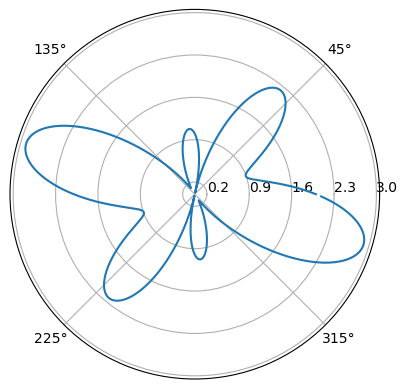

In [39]:
theta = np.arange(0., 2., 1./180.)*np.pi 
r = np.abs(np.sin(5*theta) - 2.*np.cos(theta))
plt.polar(theta, r)
plt.rgrids(np.arange(0.2, 3.1, .7), angle=0)
plt.thetagrids(np.arange(45, 360, 90) );

Sans utiliser la fonction polar il est possible de changer le système de coordonnées lors de la création d'un graphique, avec l'argument projection='polar'. Ensuite, il est possible d'afficher des courbes , points ou autres graphes à l'intérieur à l'aide des commandes usuelles.

Exemple : Utilisation de l'argument projection='polar'
ax = plt.subplot(111, projection='polar')
plt.plot(theta, r)
affiche le même graphique que précedemment:

    
Créer un tableau r de 150 nombres aléatoires grâce à un tableau obtenu par la fonction np.random.rand multiplié par 2
Créer un tableau theta de 150 nombres aléatoires grâce à un tableau obtenu par la fonction np.random.rand multiplié par 2 ππ 
Créer un tableau sizes de 150 nombres aléatoires grâce à un tableau obtenu par la fonction np.random.rand multiplié par 200  ××   r2r2 
Créer un graphique polaire grâce à la fonction plt.subplot
Afficher un scatter plot avec les coordonnées theta et r, et les paramètres c= theta, s = sizes et cmap=plt.cm.hsv (pour utiliser une colormap différente)

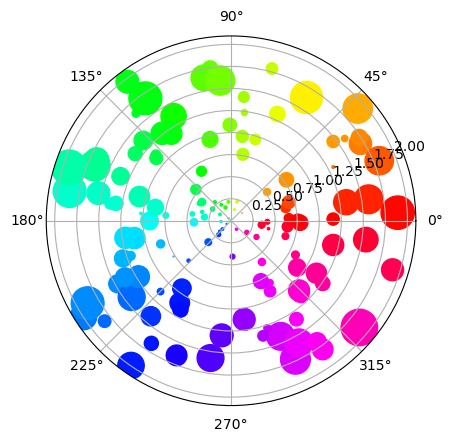

In [40]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
sizes = 200 * r**2 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
# On crée un graphique polaire vide

c = plt.scatter(theta, r, c=theta, s=sizes, cmap=plt.cm.hsv)
# On y ajoute les points de différentes couleurs et tailles.

## G - Images

En mathématiques, une image est une fonction, qui quantifie l'intensité lumineuse de chaque point d’une image. Dans une image en noir et blanc, l'intensité est le niveau de gris : plus un point est sombre, plus son niveau de gris est faible. Dans le cas d’une image en couleur, un point est quantifié par son intensité de Rouge, Vert et Bleu. Une image numérique est échantillonnée : elle est découpée suivant une grille régulière et à chaque cellule de l’image est associée une intensité appelée : pixel. Le niveau de gris ou les couleurs dans le modèles RGB sont des entiers compris entre 0 et 255.

La commande plt.imread permet de transformer une image en tableau à 3 dimensions (ou 2 si l'image est en noir et blanc). Chacune des dimensions comprend un tableau de pixels allant de 0 à 255. La commande plt.imshow permet d'afficher une image ainsi transformée à l'intérieur d'un graphique.

Importer l'image heartbeat.png dans un tableau appelé heart, et l'afficher

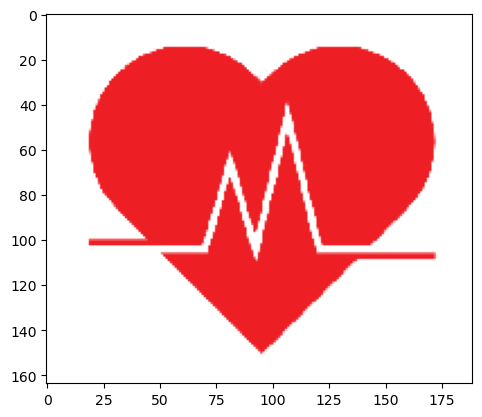

In [41]:
heart = plt.imread('heart.png') 
plt.imshow(heart);

La fonction plt.imshow crée automatiquement une figure et un graphique et affiche l'image à l'intérieur, avec une taille adaptée.
Cependant, il est possible d'ajouter une image à un graphique déjà existant, et à une position donnée, en passant l'argument extent avec les valeurs [xmin, xmax, ymin, ymax] à la fonction plt.imshow.

Le fichier 'hb.csv' contient les données de l'électrocardiogramme d'un patient.

Lire le fichier 'hb.csv'
Dans une figure de taille (8,6), et un graphique dont les limites en abscisses sont [-2,260] et en ordonnées [0,140] : afficher la courbe des données de l'éléctrocardiogramme

Afficher l'image heart chargée précédemment en la positionnant entre les points [80,170,60,140]

Ajouter au point (95,130) le texte 'Electrocardiogramme' en italique

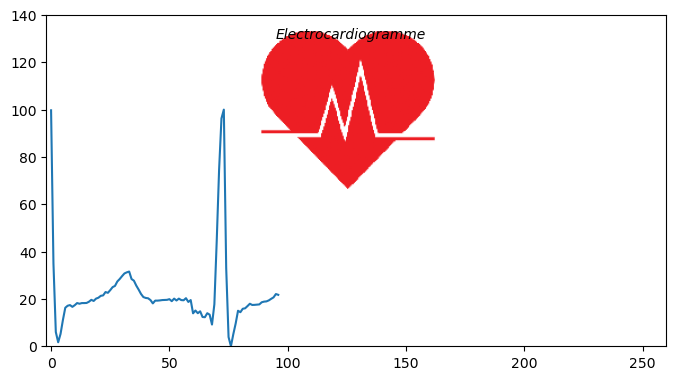

In [42]:
import pandas as pd

hb=pd.read_csv('hb.csv', header=None, sep=";")

plt.figure(figsize=(8,6))
plt.ylim([0,140])
plt.xlim([-2,260])

plt.plot(hb)

plt.text(95,130,'Electrocardiogramme', style='italic')

plt.imshow(heart, extent = [80,170,60,140]) ;

## H - Graphiques interactifs et axes 3D

Lors des exercices précédents, les différents graphiques étaient affichés dans la page grâce à la commande:

%matplotlib inline
Il est possible d'obtenir des graphiques avec quelques outils interactifs supplémentaires en remplaçant cette dernière par la commande:

%matplotlib notebook
Les graphiques ainsi affichés disposent des outils suivants: Déplacer, zoomer, obtenir les valeurs des points sur lesquelles le curseur est placé ou encore enregistrer l'image à l'état actuel.

Exécuter la cellule suivante pour afficher un exemple de graphique et avoir un aperçu des outils disponibles.

In [43]:
%matplotlib notebook
%matplotlib widget

In [45]:
import IPython
print(IPython.__version__)

8.12.0


In [46]:

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

s1 = np.random.randn(50).cumsum()
s2 = np.random.randn(50).cumsum()
s3 = np.random.randn(50).cumsum()

ax1.plot(s1,color='#33CCFF',marker='o',linestyle='-.',label='courbe 1')
ax1.plot(s2,color='#FFCC99',marker='+',linestyle='-.',label='courbe 2')
ax1.plot(s3,color='#FF33CC',marker='o',linestyle='-.',label='courbe 3')

ax1.set_xlim([0,21])
ax1.set_ylim([-15,15])

ax1.set_xticks(range(0,21,2))
ax1.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>

In [47]:
""" error à lever pour obtenir ceci => Javascript Error: IPython is not defined
avec install ipymlp et nodejs sur anaconda env ?? rien n'y fait !
PAS CE PB SUR SPYDER"""

" error à lever pour obtenir ceci => Javascript Error: IPython is not defined\navec install ipymlp et nodejs sur anaconda env ?? rien n'y fait !"

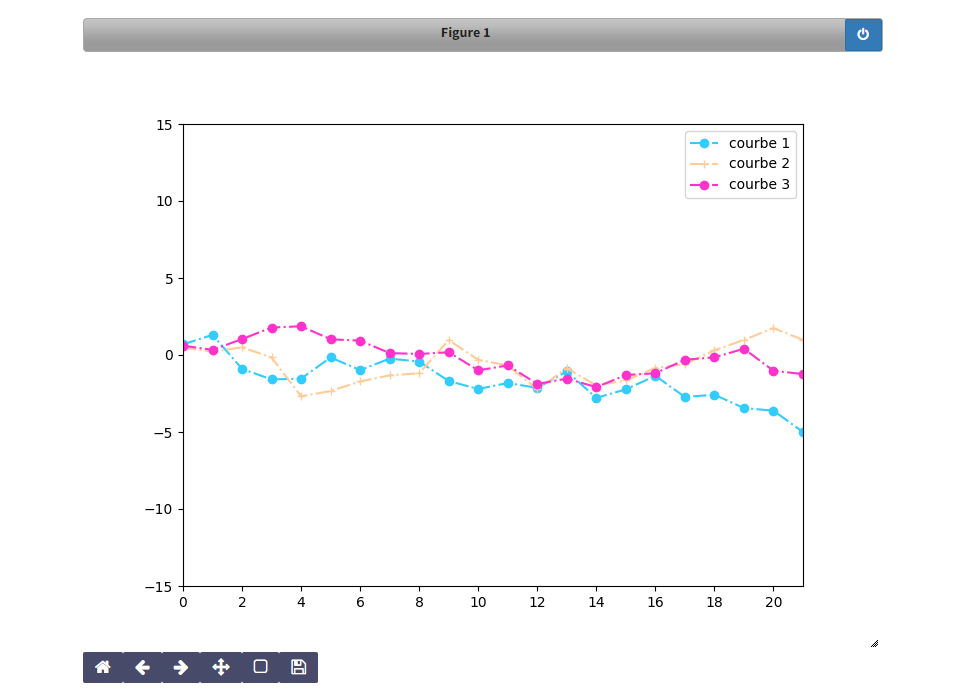

Sur Matplotlib il est également possible d'afficher des graphiques en trois dimensions, grâce à l'import du package Axes3D et à l'ajout de l'argument projection='3d' lors de la création des Axes.   

Les méthodes de création graphique élémentaires, comme celles permettant de tracer des courbes ou des nuages de points, peuvent ensuite prendre en argument une dimension supplémentaire.   

En plus des outils interactifs, les graphiques ainsi crées peuvent être déplacés sur trois dimensions.

### Courbes 3D
Importer le package Axes3D depuis mpl_toolkits.mplot3d
Créer une figure de taille 8 ×× 6, et lui ajouter un objet Axes3D
Créer un vecteur t de 100 valeurs entre 0 et  2π2π 
Créer les vecteurs x, y, z correspondant respectivement aux fonctions:  sin(3t),cos(3t),cos(t)sin(t)sin⁡(3t),cos⁡(3t),cos⁡(t)sin⁡(t) 
Afficher une courbe avec les arguments x,y et z et lui donner le label 'Courbe 3d' en légende

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

t = np.linspace(0, 2*np.pi, 100)
z = np.cos(t)*np.sin(t)
x = np.cos(3*t)
y = np.sin(3*t)
ax.plot(x, y, z, label='Courbe 3D')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

### Nuages de points 3D   
Créer le vecteur z de 100 points répartis entre 0 et 1
Créer les vecteurs x =z×sin(20z)=z×sin(20z)  et y  =z×cos(20z)=z×cos(20z) 
Afficher un nuage de points en trois dimensions à partir de x,y,z et ajouter les labels correspondants à chacun des axes

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

ax.scatter(x, y, z, c='r')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


<IPython.core.display.Javascript object>

### Barplots 3D
La méthode bar3d permet d'afficher des graphiques en barres en 3 dimensions. Pour ce faire, elle reçoit en argument les coordonnées de position des barres, ainsi que la taille des barres sur chaque axe qui correspondent respectivement à la largeur, la profondeur et la hauteur des barres.
Exemple :
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, bottom, width, depth, top)
   Sauf dans le cas de barres empilées, les coordonnées de position du troisième sont souvent nulles.
Créer le vecteur x contenant la séquence d'entier entre 1 et 10.
Créer le vecteur y : [2,3,4,5,1,6,2,1,7,2]
Créer le vecteur z, nul de taille 10

Créez les vecteurs dx et dy contenant le nombre 1 répété 10 fois, et le vecteur dz = [1,2,3,4,5,6,7,8,9,10]

Affichez un barplot 3D de couleur #14c989 à partir des positions x,y et z et des tailles de barre dx,dy,dz

In [ ]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10] #ou np.arange(1,11)
y = [2,3,4,5,1,6,2,1,7,2]
z = np.zeros(10)
dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x, y, z, dx, dy, dz, color='#14c989');


### Wireframes
Un Wireframe est une forme à trois dimensions composée uniquement de "câbles" (lignes et sommets) )et ne possédant pas de surfaces ou de textures.
Les Wireframes prennent une grille de valeurs et la projettent sur la surface tri-dimensionnelle pour un rendu facile à visualiser.

La méthode plot_wireframe permet d'afficher des wireframes, à partir de trois grilles de coordonnées à 2 dimensions.

Créer le vecteur u contenant la séquence de 30 nombres entre 0 et  ππ 
Créer le vecteur v contenant la séquence de 30 nombres entre 0 et  2π2π 
Créer le tableau x contenant le produit matriciel  sin(u)(sin(v)T)sin(u)(sin(v)T)  grâce à la fonction outer de numpy
Créer le tableau y contenant le produit matriciel  sin(u)(cos(v)T)sin(u)(cos(v)T)  grâce à la fonction outer de numpy
Créer le tableau z contenant le produit matriciel  cos(u)(𝟙30)Tcos(u)(130)T  où  𝟙30130  représente un vecteur de taille 30 rempli de 1
Afficher le wireframe obtenu grâce à x,y,z

In [ ]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones(30))

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x, y, z);

### Surface plots
Les graphiques de surface sont parfois utiles pour aider à visualiser des fonctions complexes et leurs contours en 3D. La méthode plot_surface permet d'ajouter une représentation 3D de la surface d'une fonction, colorée en fonction de ses niveaux.

Créer la matrice x défini par le produit matriciel suivant: np.outer(np.linspace(-2, 2, 30), np.ones(30))
Créer y, la transposée de x
Créer z comme la fonction :  z=cos(x2+y2)z=cos⁡(x2+y2) 
Afficher un surface plot à partir de x, y et z, en ajoutant l'argument cmap=plt.cm.Spectral_r pour personnaliser les couleurs utilisées

In [ ]:
x =  np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.T
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure(figsize= (8,6))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap=plt.cm.Spectral_r);